## TP 1
### Objetivo
El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

 - El análisis debe estar hecho en Python Pandas o R.
 - El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
 - Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
 - Agregar en Kaggle un kernel con el análisis exploratorio realizado.
 
### Evaluación

 - Originalidad del análisis exploratorio. 
 - Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
 - Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
 #### Calidad de las visualizaciones presentadas.
 - ¿Tienen todos los ejes su rótulo?
 - ¿Tiene cada visualización un título?
 - ¿Es entendible la visualización sin tener que leer la explicación?
 - ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
 - ¿Es una visualización interesante?
 - ¿El uso del color es adecuado?
 - ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
 - ¿La visualización es consistente con los datos?
#### Conclusiones presentadas.
 - ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante?
 - ¿Pudieron descubrir features en el campo ‘model’? ¿Cuales fueron?
 - ¿Identificaron patrones o funnels de usuarios que realizan checkouts/conversiones en Trocafone? 
 - ¿Se comportan de forma distinta dependiendo del tipo de dispositivo desde el cual acceden?
 - ¿Se comportan de forma distinta dependiendo del tipo de fuente de tráfico al que pertenecen?
 - ¿Realizaron algún análisis sobre búsquedas que realizan los usuarios y las keywords que utilizan apoyándose en algún tipo de visualización?
 - ¿Realizaron algún análisis de lugar donde se originan las visitas de los usuarios de Trocafone (a nivel país, regiones más importantes o ciudades más importantes) apoyándose en algún tipo de visualización?
 - ¿Pudieron descubrir features jerarquizando información de alguno de los campos (por ejemplo “screen_resolution”)?
 - ¿El análisis realiza un aporte a Trocafone?




In [14]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(15.7,10.27)})

In [15]:
#Cargo los datos en memoria
eventos = pd.read_csv('fiuba-trocafone-tp1-final-set/events.csv', low_memory=False)
eventos['timestamp'] =  pd.to_datetime(eventos['timestamp'])
eventos[['marca','modelo']] = eventos['model'].dropna().str.split(' ',n=1,expand=True)
eventos['weekday']=eventos['timestamp'].dt.weekday_name
eventos['hour']=eventos['timestamp'].dt.hour
eventos['month']=eventos['timestamp'].dt.month

eventosTest = pd.read_csv('fiuba-trocafone-tp2-final-set/labels_training_set.csv', low_memory=False)
eventosTotales = pd.read_csv('fiuba-trocafone-tp2-final-set/events_up_to_01062018.csv', low_memory=False)

In [13]:
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,country,device_type,screen_resolution,operating_system_version,browser_version,marca,modelo,weekday,hour,month
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,23,5
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,NaN,NaN,Thursday,23,5
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,iPhone,5s,Thursday,23,5
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,iPhone,5s,Thursday,23,5
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,Samsung,Galaxy S8,Tuesday,13,5


In [4]:
#Hay algun dato nulo?
eventos.isnull().any()

timestamp                   False
event                       False
person                      False
url                          True
sku                          True
model                        True
condition                    True
storage                      True
color                        True
skus                         True
search_term                  True
staticpage                   True
campaign_source              True
search_engine                True
channel                      True
new_vs_returning             True
city                         True
region                       True
country                      True
device_type                  True
screen_resolution            True
operating_system_version     True
browser_version              True
marca                        True
modelo                       True
weekday                     False
hour                        False
month                       False
dtype: bool

In [5]:
#hay alguna columna completamente nula?
eventos.isnull().all()

timestamp                   False
event                       False
person                      False
url                         False
sku                         False
model                       False
condition                   False
storage                     False
color                       False
skus                        False
search_term                 False
staticpage                  False
campaign_source             False
search_engine               False
channel                     False
new_vs_returning            False
city                        False
region                      False
country                     False
device_type                 False
screen_resolution           False
operating_system_version    False
browser_version             False
marca                       False
modelo                      False
weekday                     False
hour                        False
month                       False
dtype: bool

In [6]:
#Vamos a analizar algunas características de las columnas
eventos.describe()

,hour,month
count,1.011288e+06,1.011288e+06
mean,1.334988e+01,4.838374e+00
std,7.375013e+00,1.113527e+00
min,0.000000e+00,1.000000e+00
25%,9.000000e+00,4.000000e+00
50%,1.500000e+01,5.000000e+00
75%,1.900000e+01,6.000000e+00
max,2.300000e+01,6.000000e+00


In [6]:
#Existen 27624 usuarios únicos

cantidadDeUsuarios = eventos['person'].value_counts().count()
print('Cantidad de usuarios total: ', cantidadDeUsuarios)

Cantidad de usuarios total:  27624


In [7]:
#Existen 11 tipos de eventos distintos
eventos['event'].value_counts().count()

11

In [9]:
eventos['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [6]:
eventosTest.head(5)

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [7]:
eventosTotales.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
eventosTotales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341681 entries, 0 to 2341680
Data columns (total 23 columns):
timestamp                   object
event                       object
person                      object
url                         object
sku                         float64
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtypes: float64(1), object(22)
memory usage: 410.9+ MB


In [9]:
import seaborn as sns # Visualizaciones más fancy
import numpy as np  # Librería para aplicar álgebra lineal
import pandas as pd # Para manejar los datos (datasets)

import matplotlib.pyplot as plt # Para las visualizaciones
#from sklearn import preprocessing # Para el procesador de los datos
from sklearn.preprocessing import Imputer # Para adoptar una estrategia para los missing values
from sklearn.preprocessing import LabelEncoder as Codificar # Para codificar variables categóricas
from sklearn.preprocessing import OneHotEncoder # Para pasar el LaberEncoder vector a OneHot matriz
from sklearn.preprocessing import MinMaxScaler # Para realizar el escalado en escala (0-1)
from sklearn.model_selection import train_test_split as Separar # Para dividir en los 2 conjuntos
from statsmodels.tools.eval_measures import rmse # Para calcular el error
from sklearn.metrics import confusion_matrix as CM # Para construir la matriz de confusión
from matplotlib.colors import ListedColormap as Colors # Para pintar las regiones en Clasificación

# Regresión Logística
La regresión logísitica es un modelo que puede predecir la probabilidad que tiene una variable binaria (que puede aceptar 2 valores) de pertenecer a una clase o a otra. Es por tanto un método utilizado para la clasificación categórica de variables, especialmente útil por su simplicidad e interpretabilidad

## Escenario del problema
Queremos encontrar la relación que existe entre el evento de compra y el color.

In [10]:

eventosImportantes = eventosTotales[['storage', 'color', 'event']] # Solo nos interesa esta información

eventosImportantes['color']=eventosImportantes['color'].astype('category')
eventosImportantes['color']=eventosImportantes['color'].cat.codes
eventosImportantes['color']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0          28
1          20
2          37
3          61
4           8
5          -1
6          28
7          20
8          35
9          -1
10         33
11         50
12         37
13         37
14         -1
15          8
16          8
17         38
18         -1
19         38
20         -1
21         38
22         37
23         34
24          1
25         -1
26         38
27         51
28         26
29         -1
           ..
2341651    -1
2341652    -1
2341653    -1
2341654    -1
2341655    -1
2341656    -1
2341657    -1
2341658    -1
2341659    -1
2341660    -1
2341661    -1
2341662    -1
2341663    -1
2341664    -1
2341665    -1
2341666    -1
2341667    -1
2341668    -1
2341669    -1
2341670    -1
2341671    -1
2341672    -1
2341673    -1
2341674    -1
2341675    -1
2341676    -1
2341677    -1
2341678    -1
2341679    -1
2341680    -1
Name: color, Length: 2341681, dtype: int8

In [11]:
eventosImportantes['storage']=eventosImportantes['storage'].astype('category')
eventosImportantes['storage']=eventosImportantes['storage'].cat.codes

eventosImportantes['event']=eventosImportantes['event'].apply(lambda x: '1' if x == 'conversion' else 0 )
eventosImportantes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,storage,color,event
0,3,28,0
1,3,20,0
2,6,37,0
3,0,61,0
4,3,8,0
5,-1,-1,0
6,1,28,0
7,0,20,0
8,3,35,0
9,-1,-1,0


In [12]:
# 3. Crear los conjuntos
# 3.1. Crear variables predictoras y variable respuesta
X = eventosImportantes[['storage', 'color']].values
y = eventosImportantes['event'].values
# 3.2. Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (1756260, 2)
X_test:  (585421, 2)
y_train:  (1756260,)
y_test:  (585421,)


In [13]:
# 4. Escalar
escalador = MinMaxScaler()
sc_X_train = escalador.fit_transform(X_train)
sc_X_test  = escalador.transform(X_test)
eventosImportantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341681 entries, 0 to 2341680
Data columns (total 3 columns):
storage    int8
color      int8
event      object
dtypes: int8(2), object(1)
memory usage: 22.3+ MB


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# 5. Crear y ajustar el modelo
eventosImportantes['storage']=eventosImportantes['storage'].astype(np.int64)
eventosImportantes['color']=eventosImportantes['color'].astype(np.int64)

from sklearn.linear_model import LogisticRegression as LR
clasificador_log = LR()
clasificador_log.fit(sc_X_train, y_train.astype(int))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# 6. Hacer las predicciones
y_pred = clasificador_log.predict(sc_X_test)

In [16]:
print(X_train.shape)
print(sc_X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(sc_X_test.shape)
print(y_test.shape)

(1756260, 2)
(1756260, 2)
(1756260,)
(585421, 2)
(585421, 2)
(585421,)


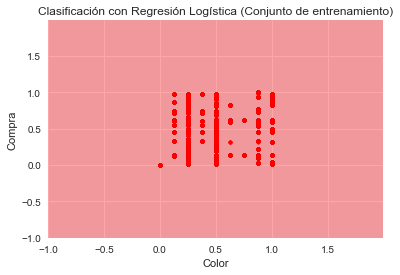

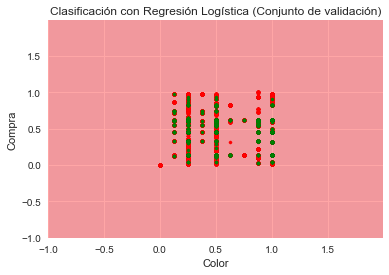

In [17]:
# 7. Analizar los resultados

# 7.1. Matrix de Confusión
cm = CM(y_test.astype(int), y_pred)

# 7.2.1 Gráfico de regiones y clasifiación (Conjunto de entrenamiento)
X_set, y_set = sc_X_train, y_train
# 7.2.1.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_log.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.1.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con Regresión Logística (Conjunto de entrenamiento)')
plt.xlabel('Color')
plt.ylabel('Compra')
plt.show()

# 7.2.2 Gráfico de regiones y clasifiación (Conjunto de validación)
X_set, y_set = sc_X_test, y_test.astype(int)
# 7.2.2.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_log.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.2.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con Regresión Logística (Conjunto de validación)')
plt.xlabel('Color')
plt.ylabel('Compra')
plt.show()

Damos cuenta que la Regresión Logística no puede separar las probabilidades de compra de no-compra. está overfitteando.

# SVM - Support Vector Machines
Los SVM utilizan la misma técnica de función de mapeo para llevar los datos a un espacio de mayor dimensión donde los datos sean linealmente separables por un plano, que divida nuestros datos por categorías.

In [18]:
eventosImportantes = eventosTotales[['storage', 'color', 'event']] # Solo nos interesa esta información

eventosImportantes['color']=eventosImportantes['color'].astype('category')
eventosImportantes['color']=eventosImportantes['color'].cat.codes
eventosImportantes['storage']=eventosImportantes['storage'].astype('category')
eventosImportantes['storage']=eventosImportantes['storage'].cat.codes

eventosImportantes['event']=eventosImportantes['event'].apply(lambda x: '1' if x == 'conversion' else 0 )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [19]:
# 3. Crear los conjuntos
# 3.1. Crear variables predictoras y variable respuesta
X = eventosImportantes[['storage', 'color']].values
y = eventosImportantes['event'].values
# 3.2. Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (1756260, 2)
X_test:  (585421, 2)
y_train:  (1756260,)
y_test:  (585421,)


In [20]:
# 4. Escalar
escalador = MinMaxScaler()
sc_X_train = escalador.fit_transform(X_train)
sc_X_test  = escalador.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
# 5. Crear y ajustar el modelo
from sklearn.svm import SVC
clasificador_SVM = SVC(kernel='rbf')
clasificador_SVM.fit(sc_X_train, y_train.astype(int))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# 6. Hacer las predicciones
y_pred = clasificador_SVM.predict(sc_X_test)

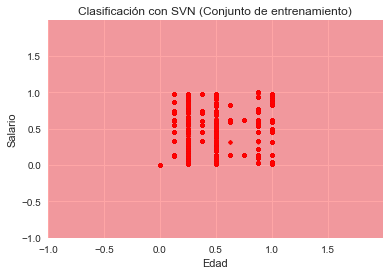

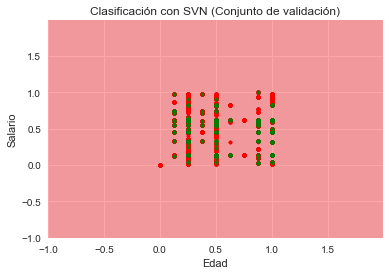

In [23]:
# 7. Analizar los resultados

# 7.1. Matrix de Confusión
cm = CM(y_test.astype(int), y_pred)

# 7.2.1 Gráfico de regiones y clasifiación (Conjunto de entrenamiento)
X_set, y_set = sc_X_train, y_train
# 7.2.1.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_SVM.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.1.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVN (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# 7.2.2 Gráfico de regiones y clasifiación (Conjunto de validación)
X_set, y_set = sc_X_test, y_test.astype(int)
# 7.2.2.1. Creamos cuadrícula (grid) para hacer las regiones (tenemos que predecir todo el plano)
planoX, planoY = (np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min()-1, stop=X_set[:,0].max()+1, step=0.01))
X1, X2 = np.meshgrid(planoX, planoY)

limite = clasificador_SVM.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.contourf(X1, X2, limite, alpha = 0.35, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 7.2.2.2. Pintamos las predicciones
for i,j in enumerate(np.unique(y_set.astype(int))):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con SVN (Conjunto de validación)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

## kNN - k Vecinos más cercanos
El algortimo kNN categoriza los puntos en función de la clase a la que pertenecen sus vecinos más cercanos. Toma una distancia (lineal por ejemplo) a un conjunto de vecinos en un radio delimitado, y compara cual es la clase predominante para convertirse en uno más de esa clase

In [1]:
import numpy as np  # Librería para aplicar álgebra lineal
import pandas as pd # Para manejar los datos (datasets)

import matplotlib.pyplot as plt # Para las visualizaciones
import seaborn as sns # Visualizaciones más fancy

from sklearn import preprocessing # Para el procesador de los datos
from sklearn.preprocessing import Imputer # Para adoptar una estrategia para los missing values
from sklearn.preprocessing import LabelEncoder as Codificar # Para codificar variables categóricas
from sklearn.preprocessing import OneHotEncoder # Para pasar el LaberEncoder vector a OneHot matriz
from sklearn.preprocessing import MinMaxScaler # Para realizar el escalado en escala (0-1)
from sklearn.model_selection import train_test_split as Separar # Para dividir en los 2 conjuntos
#from statsmodels.tools.eval_measures import rmse # Para calcular el error
from sklearn.metrics import confusion_matrix as CM # Para construir la matriz de confusión
from matplotlib.colors import ListedColormap as Colors # Para pintar las regiones en Clasificación

In [3]:
#Se especifican los tipo de datos para mejorar la performance
eventos = pd.read_csv('../TP2018/fiuba-trocafone-tp2-final-set/events_up_to_01062018.csv', 
                      dtype={"timestamp": object,#intenté hacerla datetime y no anduvo 
                             "event": 'category',
                             "person":object,
                             "url":object,
                             "sku":object,
                             "model":object,
                             "condition":'category',
                             "storage":object,
                             "color":'category',
                             "skus":object,
                             "search_term":object,
                             "staticpage":object,
                             "campaign_source":object,
                             "search_engine":object,
                             "channel":object,
                             "new_vs_returning":'category',
                             "city":object,
                             "region":object,
                             "country":object,
                             "device_type":object,
                             "screen_resolution":object,
                             "operating_system_version":object,
                             "browser_version":object})
etiquetas = pd.read_csv('../TP2018/fiuba-trocafone-tp2-final-set/labels_training_set.csv',
                        dtype={"person":object, "label":bool})

In [4]:
etiquetas['label'].value_counts()

False    18434
True       980
Name: label, dtype: int64

In [5]:
eventos.head(3)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(eventos['person'].unique()) - len(etiquetas)

19415

In [7]:
print(etiquetas['label'].value_counts())
print(etiquetas['label'].value_counts(normalize=True))

False    18434
True       980
Name: label, dtype: int64
False    0.949521
True     0.050479
Name: label, dtype: float64


In [8]:
eventos['timestamp'] =  pd.to_datetime(eventos['timestamp'])
eventos[['marca','modelo']] = eventos['model'].dropna().str.split(' ',n=1,expand=True)
eventos['weekday']=eventos['timestamp'].dt.day_name()
eventos['hour']=eventos['timestamp'].dt.hour
eventos['month']=eventos['timestamp'].dt.month
eventos['day']=eventos['timestamp'].dt.day

In [9]:
print('Cantidad de meses distintos:',len(eventos['month'].value_counts()))
eventos['month'].value_counts()

Cantidad de meses distintos: 5


5    1713920
4     309849
3     193790
2      73541
1      50581
Name: month, dtype: int64

In [10]:
eventos.groupby('person')['month'].value_counts().unstack().reset_index().fillna(0).head()

month,person,1,2,3,4,5
0,0008ed71,0.0,0.0,0.0,0.0,6.0
1,00091926,0.0,0.0,0.0,0.0,448.0
2,00091a7a,0.0,0.0,10.0,0.0,0.0
3,000ba417,0.0,0.0,0.0,0.0,206.0
4,000c79fe,0.0,0.0,0.0,0.0,17.0


In [11]:
mesesGrp = eventos.groupby('person')['month'].value_counts().unstack().reset_index()
mesesGrp.rename({1:'total_enero',2:'total_febrero',3:'total_marzo',4:'total_abril',5:'total_mayo'},inplace=True, axis=1)
print('Cantidad de elementos de mesesGrp:',len(mesesGrp))
mesesGrp.head(3)

Cantidad de elementos de mesesGrp: 38829


month,person,total_enero,total_febrero,total_marzo,total_abril,total_mayo
0,0008ed71,NaN,NaN,NaN,NaN,6.0
1,00091926,NaN,NaN,NaN,NaN,448.0
2,00091a7a,NaN,NaN,10.0,NaN,NaN


In [12]:
eventosGrp  = eventos.groupby('person')['event'].value_counts().unstack().reset_index()
eventosGrp.columns = eventosGrp.columns.map(lambda x: x if x == 'person' else 'total ' + x)
print('Cantidad de elementos de eventosGrp:',len(eventosGrp))
eventosGrp.head(3)

Cantidad de elementos de eventosGrp: 38829


event,person,total ad campaign hit,total brand listing,total checkout,total conversion,total generic listing,total lead,total search engine hit,total searched products,total staticpage,total viewed product,total visited site
0,0008ed71,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,00091926,15.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,372.0,34.0
2,00091a7a,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0


In [13]:
#Agrupamos los primeros features, de mes y evento
clientesGrp = pd.merge(eventosGrp,mesesGrp,on='person')
print('Cantidad de elementos de clientesGrp:',len(clientesGrp))
clientesGrp.head()

Cantidad de elementos de clientesGrp: 38829


,person,total ad campaign hit,total brand listing,total checkout,total conversion,total generic listing,total lead,total search engine hit,total searched products,total staticpage,total viewed product,total visited site,total_enero,total_febrero,total_marzo,total_abril,total_mayo
0,0008ed71,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6.0
1,00091926,15.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,372.0,34.0,NaN,NaN,NaN,NaN,448.0
2,00091a7a,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,10.0,NaN,NaN
3,000ba417,1.0,24.0,6.0,1.0,14.0,NaN,1.0,NaN,NaN,153.0,6.0,NaN,NaN,NaN,NaN,206.0
4,000c79fe,1.0,NaN,1.0,NaN,1.0,NaN,1.0,9.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,17.0


In [14]:
marcasGrp = eventos.groupby('person')['marca'].value_counts().unstack().reset_index()
marcasGrp.columns = marcasGrp.columns.map(lambda x: x if x == 'person' else 'total marca ' + x)
marcasGrp.head(3)

marca,person,total marca Asus,total marca LG,total marca Lenovo,total marca Motorola,total marca Outros,total marca Quantum,total marca Samsung,total marca Sony,total marca Xiaomi,total marca iPad,total marca iPhone
0,0008ed71,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
1,00091926,NaN,2.0,1.0,55.0,NaN,NaN,61.0,1.0,NaN,1.0,253.0
2,00091a7a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [15]:
#A los features ya obtenidos le agregamos las marcas de los modelos consultados. Importante el left join!
clientesGrp = clientesGrp.merge(marcasGrp,on='person',how='left').fillna(0)
clientesGrp.head(2)

,person,total ad campaign hit,total brand listing,total checkout,total conversion,total generic listing,total lead,total search engine hit,total searched products,total staticpage,...,total marca LG,total marca Lenovo,total marca Motorola,total marca Outros,total marca Quantum,total marca Samsung,total marca Sony,total marca Xiaomi,total marca iPad,total marca iPhone
0,0008ed71,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,00091926,15.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,55.0,0.0,0.0,61.0,1.0,0.0,1.0,253.0


In [16]:
'''Seguir con feature engeneering, agregando features. Algunas ideas: 
    Modelo más consultado
    dividir el mes en 3 o 4 y ver cuantos eventos se generaron en determinadas epocas del mes
    Modelo mas consultado
    color
    almacenamiento
    navegador más usado (capaz ver los 3 o 5 más frecuentes y una columna otros)
    etc'''

'Seguir con feature engeneering, agregando features. Algunas ideas: \n    Modelo más consultado\n    dividir el mes en 3 o 4 y ver cuantos eventos se generaron en determinadas epocas del mes\n    Modelo mas consultado\n    color\n    almacenamiento\n    navegador más usado (capaz ver los 3 o 5 más frecuentes y una columna otros)\n    etc'

## Machine learning
#### En principio, usaremos random forest, después vamos viendo

In [17]:
#Cargamos X e y para trabajar con KNN
X = pd.merge(clientesGrp,etiquetas,on='person')
X.drop("person", axis=1, inplace=True)
X = X.fillna(0)
y = X.pop("label")
X.head(1)

,total ad campaign hit,total brand listing,total checkout,total conversion,total generic listing,total lead,total search engine hit,total searched products,total staticpage,total viewed product,...,total marca LG,total marca Lenovo,total marca Motorola,total marca Outros,total marca Quantum,total marca Samsung,total marca Sony,total marca Xiaomi,total marca iPad,total marca iPhone
0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
# 3. Crear los conjuntos
# 3.1. Crear variables predictoras y variable respuesta
# 3.2. Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)

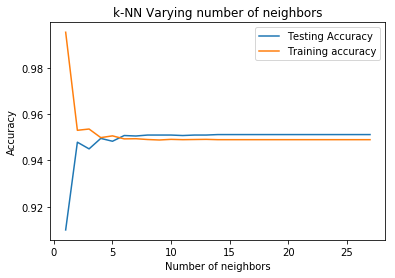

In [19]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,28)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [20]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(X_train,y_train)

#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.9505562422744128

In [21]:
clientesAEvaluar = pd.read_csv('../TP2018/fiuba-trocafone-tp2-final-set/trocafone_kaggle_test.csv')
print(len(clientesAEvaluar))
clientesAEvaluar.head(2)
datosTest = clientesAEvaluar.merge(clientesGrp, on='person',how='inner')
print('cantidad de datos:',len(datosTest))
datosTest.head(2)


19415
cantidad de datos: 19415


,person,total ad campaign hit,total brand listing,total checkout,total conversion,total generic listing,total lead,total search engine hit,total searched products,total staticpage,...,total marca LG,total marca Lenovo,total marca Motorola,total marca Outros,total marca Quantum,total marca Samsung,total marca Sony,total marca Xiaomi,total marca iPad,total marca iPhone
0,4886f805,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,0297fc1e,29.0,4.0,7.0,0.0,21.0,1.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,405.0


In [22]:
final_pred = knn.predict(X=datosTest.drop('person', axis=1).fillna(0))
final_pred

array([False, False, False, ..., False, False, False])

In [23]:
clientesAEvaluar['label'] = pd.Series(final_pred, index=clientesAEvaluar.index)
clientesAEvaluar.head()

,person,label
0,4886f805,False
1,0297fc1e,False
2,2d681dd8,False
3,cccea85e,False
4,4c8a8b93,False


In [24]:
#Exportamos el archivo a subir. De esta manera tiene el formato correcto. 
#Notar que así lo deja en el directorio de la notebook
clientesAEvaluar.to_csv('entrega_2.csv',index=False)
